# Resolução Projeto Final Ciencia de Dados

Aluno 1:
- Nome:Afonso Marques
- Número:21705671
- Email:afonsomar99@gmail.com

Aluno 2:
- Nome:Marcelo Costa
- Número:21705266
- Email:marcelosalgueirotgeio13@gmail.com


## Parte I


Import's utilizados ao longo do projeto.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import copy

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, matthews_corrcoef, accuracy_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression, LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from scipy import stats
from math import exp

# Pergunta 1 e 2
<p><div style="text-align: justify"> 
   Neste Exercício foi nos pedido para descarregar um dataset de vinhos (wine_q.csv). Na nossa resolução iremos utilizar o mesmo, no entanto estará presente no Git. Após termos o termos descarregado o dataset deviamos carregá-lo num Pandas *Dataframe*.
</div>    

In [2]:
%matplotlib inline
url = "https://raw.githubusercontent.com/tiago-santos-ulus/sim_2019/master/data/wine_q.csv"
df = pd.read_csv(url, error_bad_lines=False)

<div style="text-align: justify"> 
No seguinte dataframe *df*, é possivel vermos todos os valores que o constituem. Sendo possivel observar que o mesmo é constituido por 3961 linhas cada uma com 12 colunas relativas a caracteristicas de vinhos.
</div>

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,0
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,1
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,0
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,0
4,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,1
5,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,1
6,8.1,0.270,0.41,1.45,0.033,11.0,63.0,0.99080,2.99,0.56,12.000000,0
7,8.6,0.230,0.40,4.20,0.035,17.0,109.0,0.99470,3.14,0.53,9.700000,0
8,7.9,0.180,0.37,1.20,0.040,16.0,75.0,0.99200,3.18,0.63,10.800000,0
9,6.6,0.160,0.40,1.50,0.044,48.0,143.0,0.99120,3.54,0.52,12.400000,1


# Exercicio 3
<div style="text-align: justify"> 
Apos termos o dataframe, foi altura de verificar se este continha dados duplicados. Para isso verificamos a quantidade de vinhos antes de removermos os duplicados *(3961)* e depois de serem removidos *(3961)*, concluindo assim que não ecistiam dados duplicados.
Utilizamos a função drop_duplicates() presenta na biblioteca *pandas*. Esta função retorna o dataframe com as linhas duplicadas removidas.
</div>

In [4]:
oldNum = df.count()

df = df.drop_duplicates()

print(oldNum == df.count())

fixed acidity           True
volatile acidity        True
citric acid             True
residual sugar          True
chlorides               True
free sulfur dioxide     True
total sulfur dioxide    True
density                 True
pH                      True
sulphates               True
alcohol                 True
quality                 True
dtype: bool


# Exercicio 4
<div style="text-align: justify"> 
A fim de removermos os duplicados, foi altura de obter os histogramas das diferentes variáveis e determinar por inspeção visual, quais das destribuições não são normais, chegando à conclusão que apenas existia a certeza no histograma relativo à *quality*, não sendo o mesmo normal.Todos os outros histogramas têm uma margem consideravel de duvida, no sentido em que não é perceptivel apenas com apoio visual.
</div>

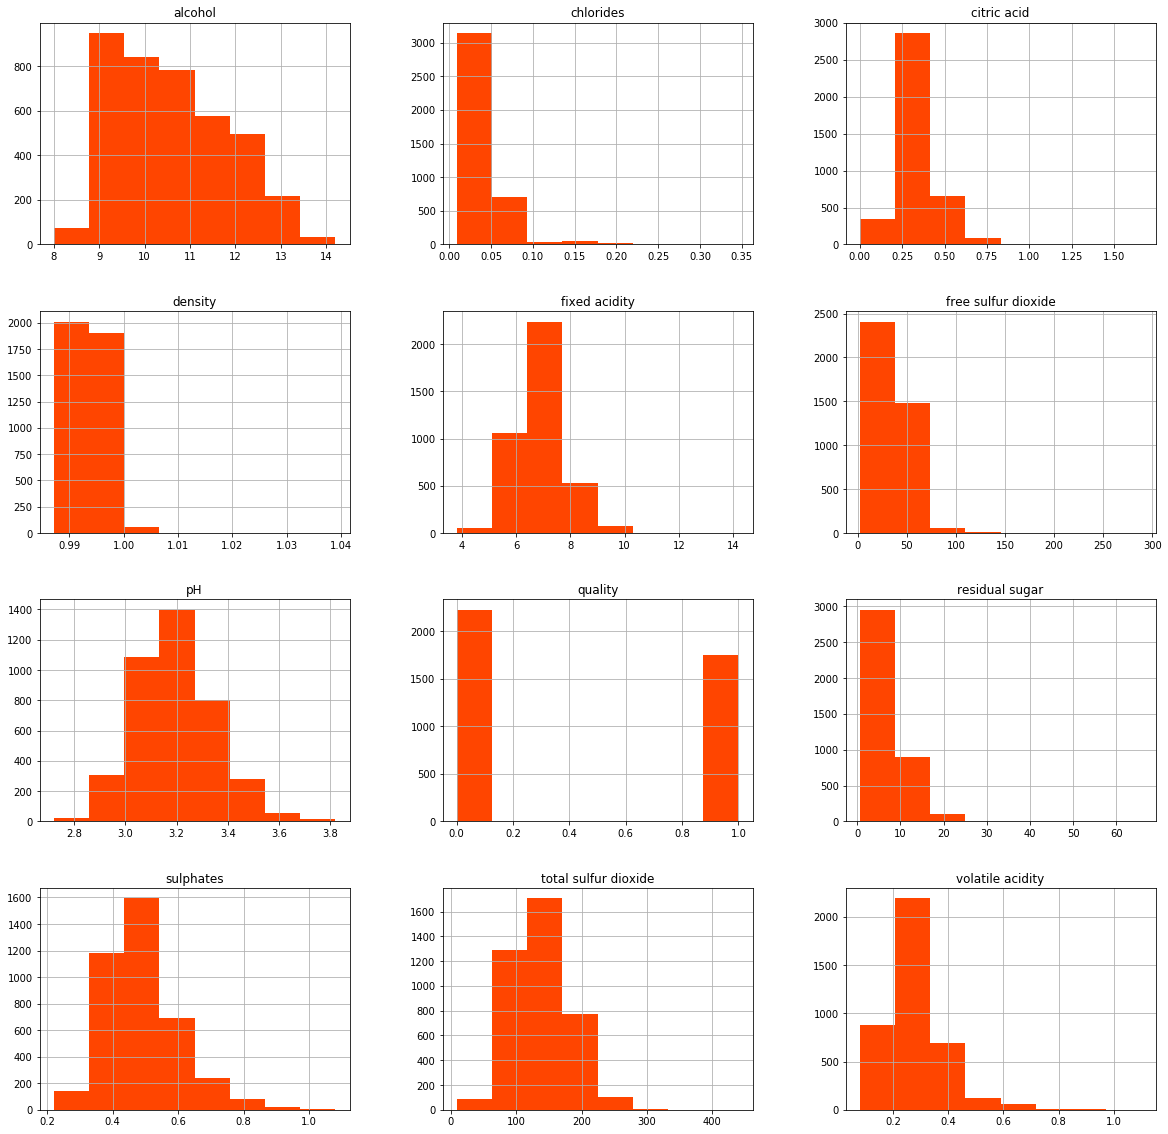

In [5]:
hist = df.hist(bins = 8, figsize=(20,20) ,color = "orangered" )

<div style="text-align: justify"> 
Para uma melhor vizualização da distribuição dos dados podemos também fazer plot da estimativa de densidade sob o histograma.
</div>

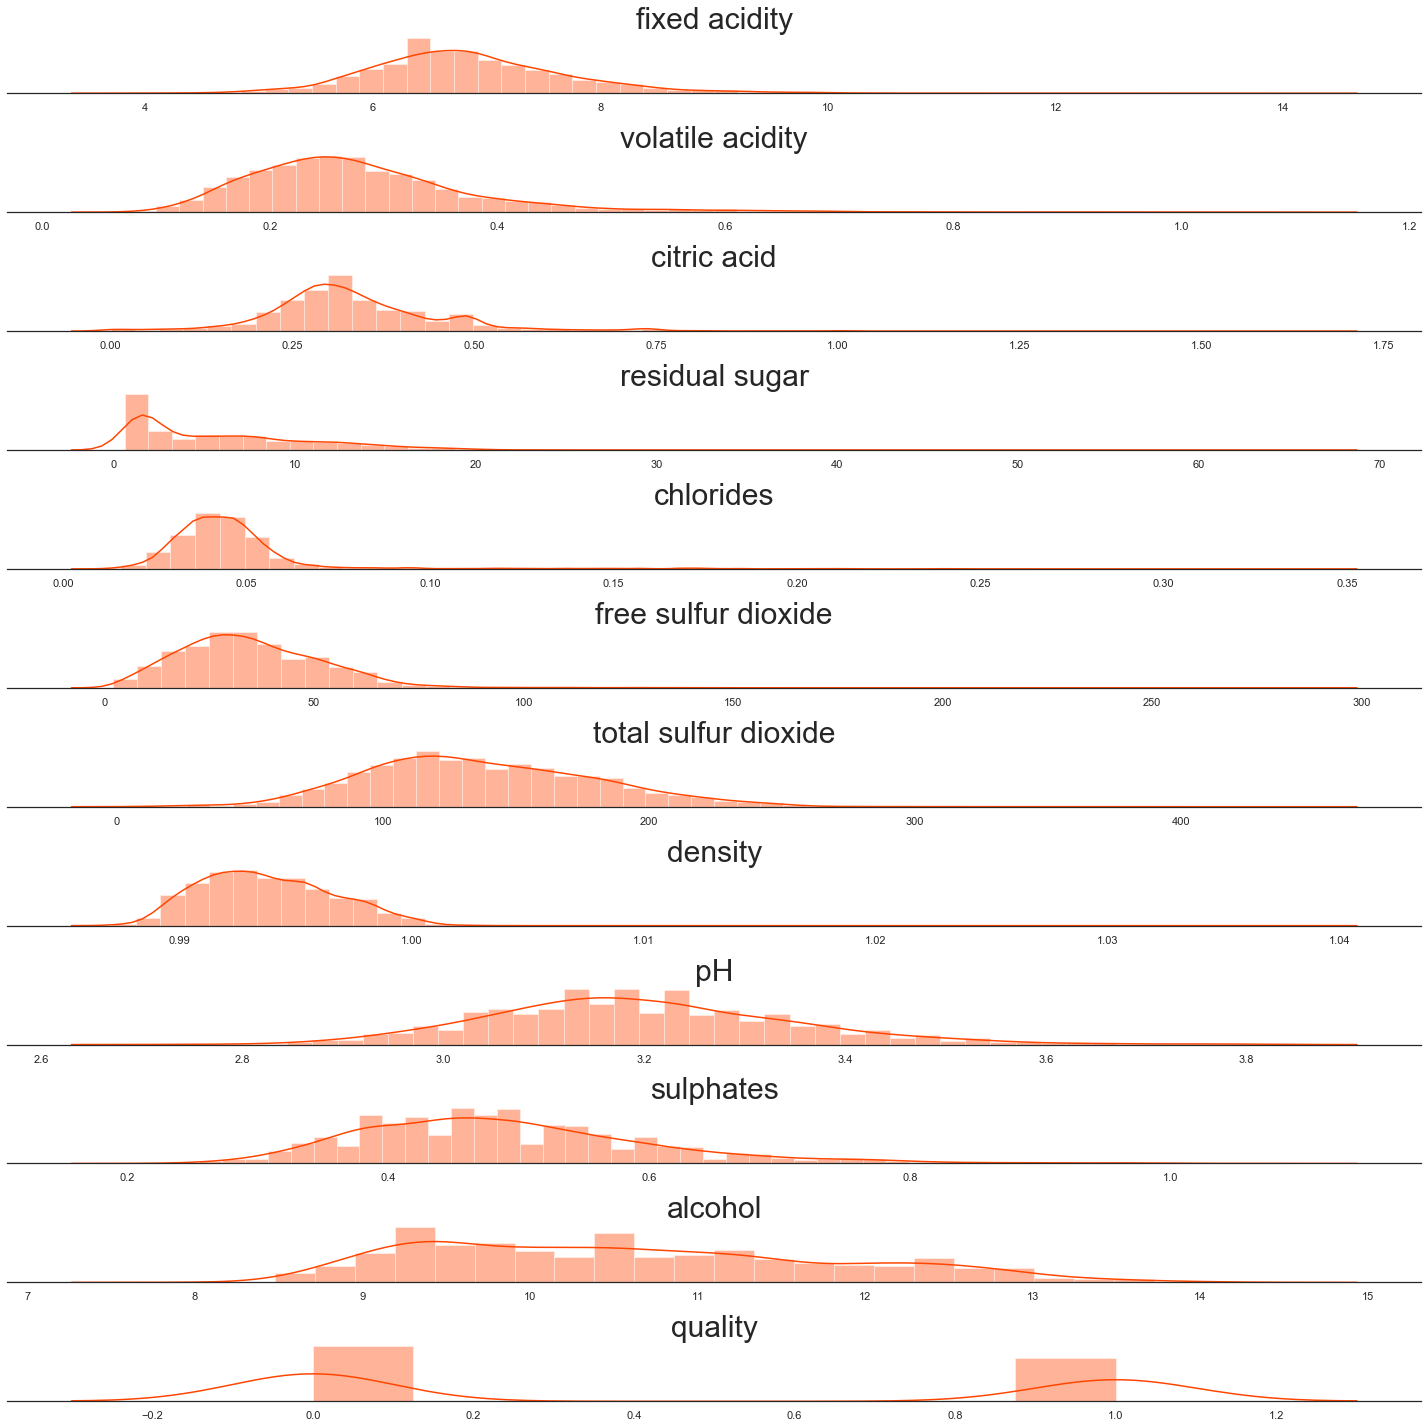

In [6]:

sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
fig, axes = plt.subplots(12, 1, figsize=(20, 20))
sns.despine(left=True)

# Plot a historgram and kernel density estimate
for i in range(0,12):
        col=df.columns[i]
        sns.distplot(df[col].values, color="orangered", ax=axes[i])
        axes[i].set_title(col, fontsize=30)
        
plt.setp(axes, yticks=[])
plt.tight_layout()

# Exercicio 5
<div style="text-align: justify"> 
O teste de *Jarque-Bera* é utilizado para testar a normalidade, tendo como *hipótese nula H0* a normalidade. Sendo assim se *p-value* for inferior a 5% (ou 10%), p < 0.05 (p < 0.1), então iremos rejeitar a normalidade. Para calcularmos o p-value percorremos todas as variáveis presentes no dataframe e calculamos o seu valor, para tal utilizamos a função *jarque_bera()* , pensente na biblioteca *stats*. Uma vez que numa estatistica normal, tem a propriadade moda, média e mediana iguais, decidimos colocar como forma de apoio.
Após termos executado o teste de *jarque-bera*, chegamos à conclusão que não há probabilidade de algum dos gráficos ser normal, uma vez para todos, o *p-value* é 0.0.
</div>

In [7]:
for col in df:
    print("P-value of " +col + "= " + str(stats.jarque_bera(df[col])[1]))
    print("Média " + str(df[col].mean()))
    print("Mediana " + str(df[col].median()))
    print("Moda " + str(df[col].mode()) +"\n")
    tupl = stats.jarque_bera(df[col])

P-value of fixed acidity= 0.0
Média 6.839346124715964
Mediana 6.8
Moda 0    6.8
dtype: float64

P-value of volatile acidity= 0.0
Média 0.2805377429941933
Mediana 0.26
Moda 0    0.28
dtype: float64

P-value of citric acid= 0.0
Média 0.33433223933349726
Mediana 0.32
Moda 0    0.3
dtype: float64

P-value of residual sugar= 0.0
Média 5.914819490027788
Mediana 4.7
Moda 0    1.2
1    1.4
dtype: float64

P-value of chlorides= 0.0
Média 0.04590507447614268
Mediana 0.042
Moda 0    0.036
dtype: float64

P-value of free sulfur dioxide= 0.0
Média 34.889169401666244
Mediana 33.0
Moda 0    29.0
dtype: float64

P-value of total sulfur dioxide= 0.0
Média 137.19351173945972
Mediana 133.0
Moda 0    111.0
dtype: float64

P-value of density= 0.0
Média 0.9937895304216049
Mediana 0.9935
Moda 0    0.992
dtype: float64

P-value of pH= 0.0
Média 3.195458217621807
Mediana 3.18
Moda 0    3.16
dtype: float64

P-value of sulphates= 0.0
Média 0.49035092148447523
Mediana 0.48
Moda 0    0.5
dtype: float64

P-value of

<div style="text-align: justify"> 
A titulo de exemplo iremos apresentar dois gráficos. O primeiro será uma distribuição *normal* e o segundo uma distribuição de *t-student*. A função t-student foi escolhida pela sua propriedade de se aproximar a uma f.d.p normal consoante o de graus de liberdade (quanto mais graus de liberdade mais se aproxima a uma f.d.p normal). Vamos verificar que mesmo as curvas sendo "parecidas", uma é normal e a outra não. Para comprovar, iremos tambem fazer o teste de *jarque-bera*.
</div>

(array([   4.,    5.,   30.,  245.,  809., 1056.,  635.,  181.,   26.,
           9.]),
 array([-5.32493298, -4.33945338, -3.35397378, -2.36849418, -1.38301458,
        -0.39753498,  0.58794461,  1.57342421,  2.55890381,  3.54438341,
         4.52986301]),
 <a list of 10 Patch objects>)

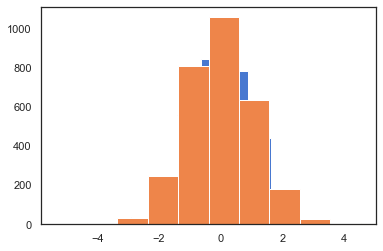

In [8]:
gaussian = np.random.normal(size=3000)
plt.hist(gaussian)

tstudent = np.random.standard_t(10,size=3000) #aplicada t-student
plt.hist(tstudent)

(array([   4.,    5.,   30.,  245.,  809., 1056.,  635.,  181.,   26.,
           9.]),
 array([-5.32493298, -4.33945338, -3.35397378, -2.36849418, -1.38301458,
        -0.39753498,  0.58794461,  1.57342421,  2.55890381,  3.54438341,
         4.52986301]),
 <a list of 10 Patch objects>)

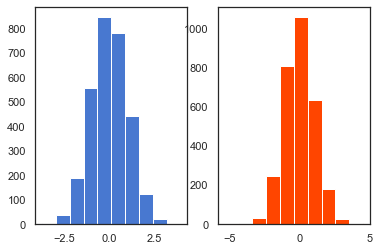

In [9]:
plt.subplot(1,2,1)
plt.hist(gaussian)
plt.subplot(1,2,2)
plt.hist(tstudent , color = "orangered")

<div style="text-align: justify"> 
De forma a visualizarmos melhor se o histograma tem uma destribuição normal, vamos agora fazer o *fit* no *kernel density estimate*. Como é possivel ver, mesmo o segundo histograma tem uma duvida consideravel relativamente à sua normalidade apenas com o apoio visual.
</div>

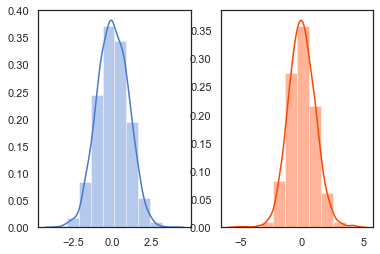

In [10]:
plt.subplot(1,2,1)
sb.distplot(gaussian, bins = 10)
plt.subplot(1,2,2)
sb.distplot(tstudent, color = "orangered", bins = 10)

In [11]:
print(stats.jarque_bera(gaussian))
pValGaussian = stats.jarque_bera(gaussian)[1]
pVtstudent = stats.jarque_bera(tstudent)[1]
print("P-value of gaussian is: " + str(pValGaussian.round(2)))
print("P-value of t-student is: " + str(pVtstudent))

(0.754368756180385, 0.6857896176585208)
P-value of gaussian is: 0.69
P-value of t-student is: 0.0


<div style="text-align: justify"> 
Logo através da analise do *P-value* dos histogramas, podemos confirmar que existe razão para não acreditar que guassian não é uma distribuição normal (neste caso temos a certeza, apenas estamos a generalizar) e *rayleigh* não é uma distribuição normal. Estes resultados vêm confirmar o que vimos anteriormente. Ao temos obtido o *P-value* 0.0 em todos as distribuições do dataset.
</div>    

# Exercicio 6
<div style="text-align: justify"> 
Iremos agora calcular a matriz de correlação. A fim da matriz estar formada, iremos representá-la de forma a ser possivel visualiza-la. 
</div>    

In [12]:
corrMatrix = df.corr()

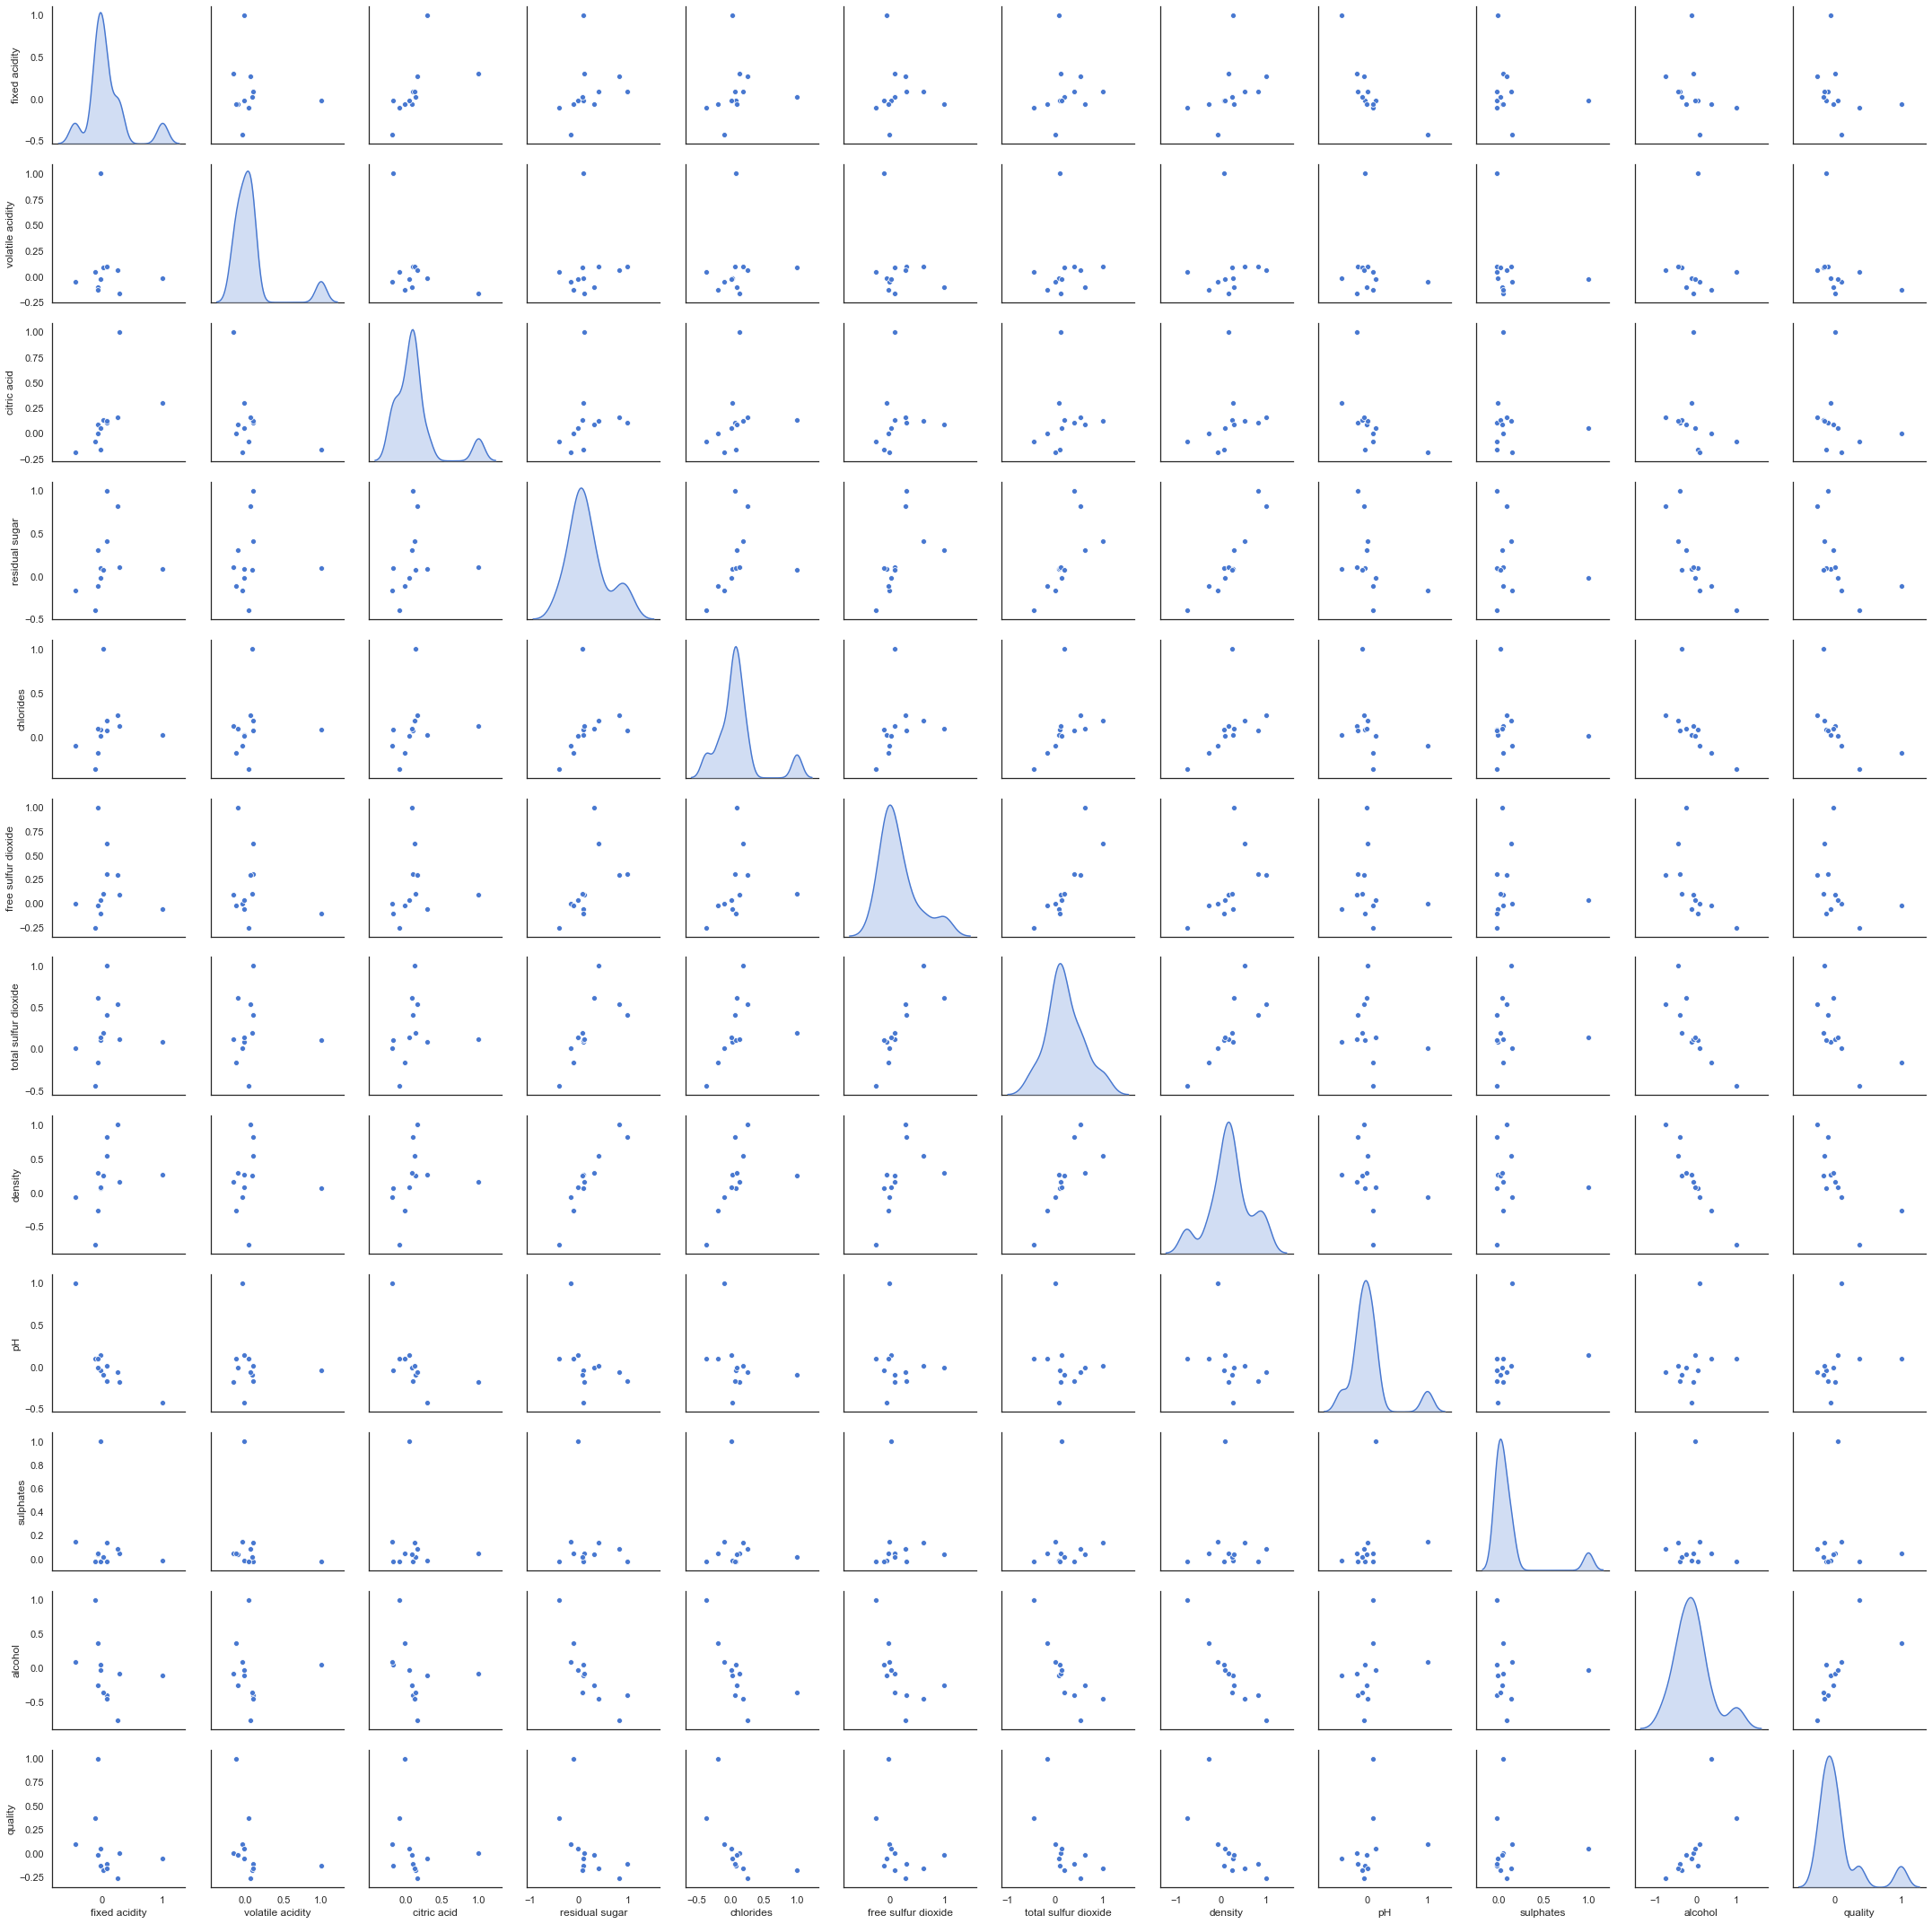

In [13]:
sb.pairplot(corrMatrix ,diag_kind="kde")

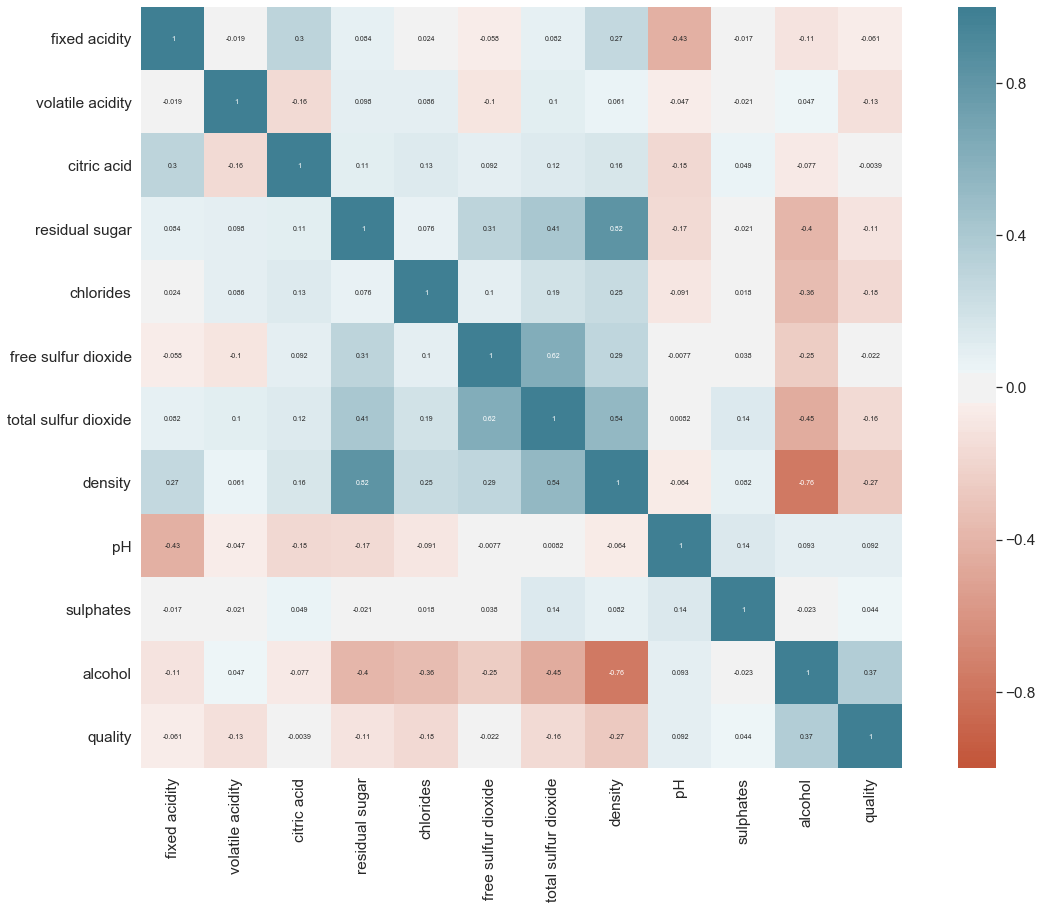

In [14]:
# plt.subplots(figsize=(7, 5))
plt.figure(figsize=(20, 14))
sns.set(font_scale=1.4) 
ax = sns.heatmap(
    corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    annot_kws={"size": 7}
    
)

Uma vez que obtivemos uma matriz de correlação bastante esbranquiçada, podemos deduzir que não existe muita correlação entre as variáveis.

# Exercicio 7
<div style="text-align: justify"> 
O *Principal Component Analysis* (PCA), espera que a distribuição da matriz fonte seja normal, no entanto este requisito não é muito estrito. Quando estamos a olhar para os nossos histogramas, devemos apenas remover as destribuições que são muito diferentes da distribuição normal. No nosso caso, não iremos incluir a distribuição *quality*. 
</div>
<div style="text-align: justify"> 
Uma vez que nenhuma das distribuições é normal, iremos aplicar o PCA por conta e risco proprio, uma vez que o mesmo não garante para distribuições não normais um output de meta-variáveis mutuamente ortogonais ou seja, as variaveis poderão ter alguma dependencia.
</div>
<div style="text-align: justify"> 
No entanto devemos ter em consideração a standardarização dos dados, para que dados com valores elevados não tenham maior peso sobre dados de valores mais baixos. Para isso será feito um splot da variância obtida pelo PCA antes e depois da standardização.
</div>

# Exercicio 8
<div style="text-align: justify"> 
Neste exercicio vamos separar as variáveis independentes das dependentes e colocar cada um dos tipos num objeto de *numpy*, tendo neste caso utilizado uma matriz. 
</div>

In [15]:
dependent = df["quality"].to_numpy()
df.shape[1]

12

In [16]:
df = df.drop(columns="quality")
independt = df.to_numpy()

In [17]:
df.shape[1]


11

# Exercicio 9
<div style="text-align: justify"> 
Nesta etapa, deveriamos ter em conta as variáveis independentes e aplicar o *Principal Component Analysis* as mesmas. 
<p>Para avaliar o processo de standardização vamos aplicar o PCA antes de depois deste processo para verificar os resoltados e tirar algumas conclusões.
<p>Para isso, começamos por utilizar a biblioteca *StandardScaler* e dentro dela a função *fit_transform* que em primeiro lugar ajusta os dados e depois transforma-os. Apos este passo, aplicamos o *PCA* a todas as linhas e colunas, exeptuando a ultima, uma vez que  uma é variáveis alvos e a outra variáveis categóricas. A fim deste processo fizemos o fit entre a matriz normal e o obtido após aplicarmos o *PCA*. Por fim visualizamos a percentagem que cada dimensão explica.
</div>

#### Passo 1: Correr PCA e listar a variância para todas as componentes principais (não standardizado)

In [18]:

n_components=independt.shape[1]
non_norm_pca = PCA(n_components=n_components)#get the model

non_norm_pca.fit(independt[:,:])
pd.DataFrame(non_norm_pca.explained_variance_ratio_).transpose()

,0,1,2,3,4,5,6,7,8,9,10
0,0.911751,0.0784,0.008987,0.000506,0.000332,0.000009,0.000007,0.000005,0.000004,2.020285e-07,1.584194e-10


##### 1.1: Not normalized Data Loadings

In [19]:
non_norm_pca_loadings = pd.DataFrame(non_norm_pca.components_.transpose(), 
                                     index = pd.DataFrame(independt).columns, 
                                     columns=[f"PC{i}" for i in range(1, independt.shape[1]+1)])

non_norm_pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.001387,-0.009669,0.013551,-0.149874,0.984572,0.076450,-0.044696,-0.005322,-0.000149,0.002325,-0.000766
1,0.000198,-0.001726,0.001775,0.014280,-0.004622,-0.120048,-0.380764,0.185129,0.897288,-0.031252,-0.000702
2,0.000341,0.000094,0.001670,-0.005230,0.042405,-0.065391,0.868546,-0.261078,0.413005,-0.028072,-0.000374
3,0.045543,0.014519,0.996320,0.070800,-0.003291,0.005677,0.000184,0.000050,-0.002248,0.000636,-0.000375
4,0.000098,-0.000066,0.000019,-0.006830,-0.001399,-0.017333,0.014002,0.003280,0.037838,0.998996,-0.004489
5,0.262402,0.964561,-0.025604,-0.005905,0.008459,0.000695,-0.001050,0.000707,0.001487,-0.000022,0.000007
6,0.963806,-0.263201,-0.040997,0.010868,-0.001671,-0.000689,0.000055,-0.000478,-0.000790,-0.000020,-0.000004
7,0.000035,-0.000020,0.000439,-0.001165,0.000318,0.003580,0.000234,0.000359,0.001462,0.004488,0.999982
8,0.000020,-0.000203,-0.006407,0.016179,-0.075730,0.941864,-0.079889,-0.279182,0.149516,0.012704,-0.003483
9,0.000333,-0.000612,-0.002061,0.002938,-0.003899,0.296645,0.303405,0.905303,-0.018458,-0.001371,-0.001419


#### Passo 2: Correr PCA e listar a variancia para todas as componentes principais (standardizado)

##### 2.1: Aplicar Standardização

In [20]:
scaler = StandardScaler()
mtrx_norml = scaler.fit_transform(df.values[:,:])

##### 2.2: Correr PCA e listar a variância para todas as componentes principais para os dados standardizados

In [21]:
pca_norm = PCA(n_components=df.shape[1])
pca_norm.fit(mtrx_norml)
pca_norm.explained_variance_ratio_

array([0.28941239, 0.14513327, 0.11027694, 0.09445886, 0.08919371,
       0.08448178, 0.06564064, 0.05473092, 0.03898492, 0.02553686,
       0.0021497 ])

##### 3.3: Loadings Normalizados

In [22]:
pca_norm_loadings = pd.DataFrame(pca_norm.components_.transpose(),
                                 index = pd.DataFrame(independt).columns, 
                                 columns=[f"PC{i}" for i in range(1, independt.shape[1]+1)])
pca_norm_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.152835,-0.595986,-0.055466,0.003065,0.260053,0.002843,-0.211089,0.563920,0.370509,0.136228,-0.179780
1,0.026771,0.063344,0.672198,0.168251,0.383853,0.433047,0.285174,0.108064,-0.179983,0.233361,-0.019625
2,0.151911,-0.384032,-0.461453,0.142312,0.000857,0.120641,0.711136,-0.072173,-0.261001,0.050317,-0.010951
3,0.422095,0.024514,0.202225,-0.280083,0.159016,-0.263243,0.241202,-0.422158,0.358607,-0.072347,-0.486911
4,0.211968,-0.029701,0.108585,0.669413,-0.487061,0.244592,-0.022996,-0.136997,0.417670,-0.052923,-0.026149
5,0.308153,0.260425,-0.309921,-0.337623,-0.099782,0.495466,-0.142814,-0.058128,0.125295,0.575552,0.031692
6,0.416806,0.225205,-0.123396,-0.093913,0.109857,0.376190,-0.055537,0.274100,-0.110490,-0.711630,-0.032872
7,0.512038,0.013104,0.128844,0.006199,0.085378,-0.349913,0.080040,0.050298,0.079800,0.074948,0.755219
8,-0.114020,0.578270,-0.145005,0.134127,-0.003516,-0.257729,0.400874,0.526391,0.269723,0.123225,-0.146379
9,0.047439,0.191317,-0.352815,0.497931,0.658631,-0.063262,-0.262524,-0.274051,-0.009803,0.070471,-0.043031


<div style="text-align: justify"> 
No caso de querermos uma explicação do nosso dataset superior a 88%, iriamos precisar das primeiras 8 componentes. O que é possivel ver pelo primeiro elemento do output do *np.argwhere*.
</div>

In [23]:
var_cumsum = np.cumsum(pca_norm.explained_variance_ratio_)
np.argwhere(var_cumsum > 0.88)[0]

array([7], dtype=int64)

#### 3: Plot das variâncias das PC antes e depois da standardização

Line 1 has: (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
Line 2 has: (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)


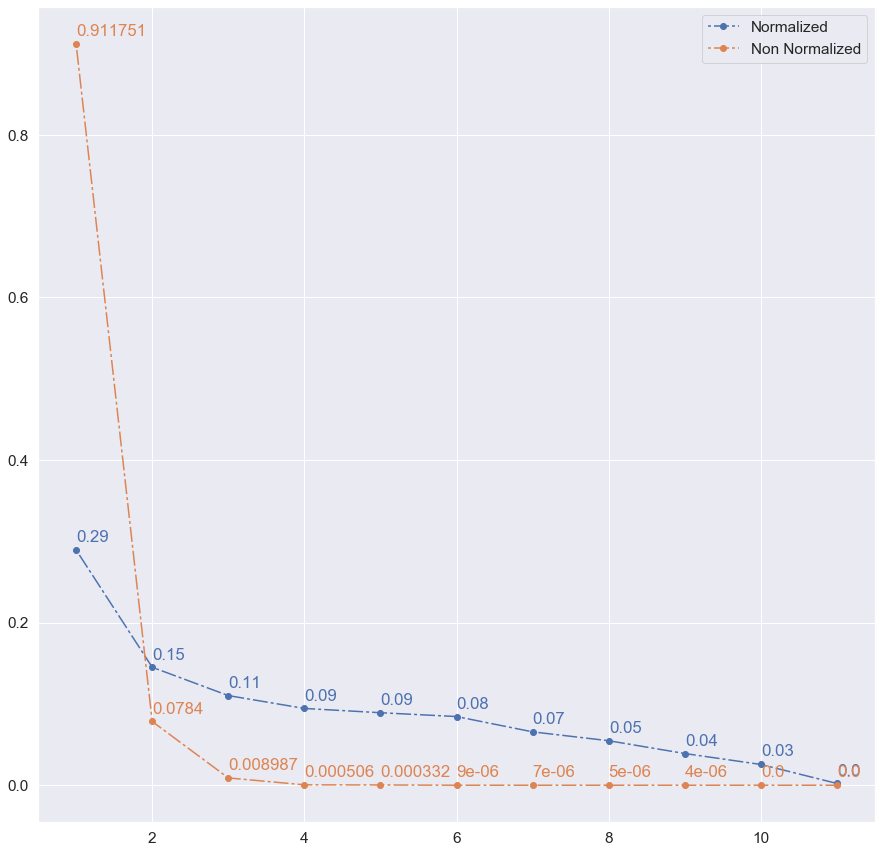

<Figure size 720x1440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [24]:
y1 = np.array(pca_norm.explained_variance_ratio_) #get variance data from non normalized data set
y2 = np.array(non_norm_pca.explained_variance_ratio_)#get variance data from normalized data set

x = np.arange(1, len(y2)+1) #x-axis to plot all 13 PC

xticks = np.array((1,13)) #ticks to modify later
                
fig, ax = plt.subplots(figsize=(15,15))
fig = plt.figure(figsize=(10, 20))

# Create line1 to plor non normalized data
line1, = ax.plot(x, y1, label='Normalized', marker='o')
line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break
color1=line1.get_color() #get color to use later on the annotation method

# Create line2 to plor non normalized data
line2, = ax.plot(x, y2, label='Non Normalized', marker='o')
line2.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break
color2= line2.get_color()#get color to use later on the annotation method

print(f"Line 1 has: {color1}\nLine 2 has: {color2}")

#Fill points on the graph for both lines
for i, txt in enumerate(y1):
    txt=round(txt,2)
    ax.annotate(txt, xy=(x[i], round(y1[i],3)), xytext=((x[i], round(y1[i]+0.01,3))), color=color1)
    
for i, txt in enumerate(y2):
    txt=round(txt,6)
    ax.annotate(txt, xy=(x[i], round(y2[i],3)), xytext=((x[i], round(y2[i]+0.01,3))), color=color2)

ax.legend()
plt.show()
plt.savefig("PC_Variance.png")

<div style="text-align: justify"> 
    Com este gráfico podemos concluir que ao aplicar o PCA antes da standardização dos dados obtemos ótimos valores de variância. 
    Já que o PCA é um método que utiliza a variância como medida de explicabilidade dos dados e por consequência diminuir a dimensão do nosso dataset. 
    Podemos verificar que depois da standardização as features do nosso dataset não demonstram grandes valores de variância e por sua vez não será possivel diminuir a dimensão do nosso dataset.
</div>

In [25]:
# Apenas testes, para remover
var_cumsum = np.cumsum(pca_norm.explained_variance_ratio_)
np.argwhere(var_cumsum > 0.88)[0]

array([7], dtype=int64)

<div style="text-align: justify"> 
Dicidimos que um grau aceitável de explicabilidade/variancia seria apartir de 88%. Verifica-se então que para tal teriamos que utilizar pelo menos 7 dimensões. Para casos, como por exemplo, dignosticos médicos talvez 88% não fosse suficiente. Tudo depende do caso a que estamos a aplicar o nosso modelo.
 </div>

# Exercicio 10


In [26]:

X_train, X_test, y_train, y_test = train_test_split(independt, dependent, test_size=0.25, random_state=40)

#print(X_train.)

**X\_train** é o nosso dataset de treino.

**y_train** é o nosso set de etiquetas para todos os dados presentes em *x_train*.

**X_test** é o nosso dataset de teste.

**y_test** é o nosso set de etiquetas para os dados presentes em *X_test*.

## Parte II

<div style="text-align: justify"> 
    Nesta parte do projecto é pedido para calcular algumas métricas de um modelo de regressão logística. Iremos então aplicar algumas métricas aprendidas em sala de aula para avaliar o nosso modelo e outros métodos que foram investigados. Cada um dos métodos segue com uma pequena introdução teórica.
</div>

### Pergunta 1
<div style="text-align: justify"> 
Uma vez feita a partição do dataset em duas partes (75% de treino e 25% de teste) no exercicio anterior, apenas tivemos que utilizar os valores presentes em *X_train, X_test, y_train* e *y_test*. 
 </div>   

### Modelo de Regressão Logistica
<div style="text-align: justify"> 
A Regressão Logistica é um algoritmo de classificação utilizado na classificação binária, ou seja, o conjunto de outputs é limitado/discreto. Pegando no exemplo da regressão linear, este é aplicada a um modelo que tem como output um conjunto continuo de valores.
</div>
    
<b>Mas como é que a regressão logistica funciona?</b><p>
A regressão logistica utiliza a função sigmoid para traduzir valores continuos em valores que descrevem a probabilidade é uma dada sample pertencer a uma das classes a ser avaliada.    

### Função Sigmoid 

Como descrito previamente, a função sigmoid é utilizada para mapear valores previstos em probabilidades. Esta função mapeia todos os valores continuos para valores entre 0 e 1. <p>Esta função é utilizada pois está compreendida entre 0 e 1, utiliza-se então um threshold a 0.5 para decidir a que classe uma dada sample pertence.

In [27]:
def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+exp(-item)))
    return a

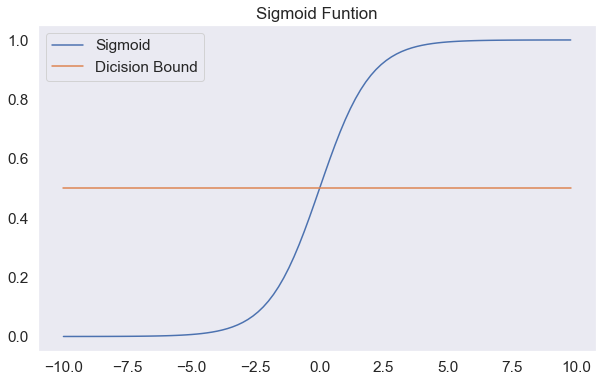

In [28]:
x = np.arange(-10., 10., 0.2)
plt.figure(figsize=(10, 6))
plt.plot(x,sigmoid(x),label='Sigmoid')
plt.plot(x,np.full((100, 1), 0.5), label='Dicision Bound')
plt.title('Sigmoid Funtion')
plt.legend()
plt.grid()
plt.show()

### Interpretação

Sendo, 
$
\begin{align}
\ h_ \theta\ (x) & = g(\theta^T*x \ )\
\end{align}
$ 
a nossa hipótese, onde, 
$
\begin{align}
\ g(\theta^T*x \ ) & = \frac{1}{(1+e^{\theta^T\ *x })}\
\end{align}
$

A nossa função hipótese dá-nos uma estimativa probabilistica para um input x.
<p> Exemplo, se o nosso modelo estiver a tentar prever se um paciente tem um tumor maligno ou benigno, utilizando apenas o tamanho do tumor, temos como possiveis outputs y={0,1} sendo 0 benigno e 1 maligno, se obtivermos h(x)=0.7 isto quer dizer que a probabilidade de y=1 é 0.7 (70%). Esta probabilidade também pode ser expressada da seguinte maneira,<p>
$
\begin{align}
\ h_ \theta\ (x) & = p(y=1 | x; \theta\ )\
\end{align}
$
    , a probabilidade de um dado paciente ter um tumor após se verificar X tamanho. Sendo esta probabilidade parameterizada por 
$
\begin{align}
\theta\
\end{align}
$

### Limite de decisão

A nossa função de previsão atual retorna um valor probabilistico entre 0 e 1. Para mapear isto para um conjunto discreto de valores (0/1) temos que delimitar um threshold de decisão. Se um dado valor estiver a cima do threshol é porque pertence a uma classe, se estiver abaixo pertence à outra classe. Neste caso temos, <p>
$
\begin{align}
p>=0.5, class=1
\end{align}
$
<p>
$
\begin{align}
p<0.5, class=0
\end{align}
$

### Pergunta 2 e 3

<br><div style="text-align: justify"> 
    
Uma vez feita a partição do dataset em duas partes (75% de treino e 25% de teste) no exercicio anterior, apenas tivemos que utilizar os valores presentes em *X_train, X_test, y_train* e *y_test*. 
</div>  

In [29]:
clf = LogisticRegression(random_state=0 , solver ='lbfgs', max_iter = 1250)
model = clf.fit(X_train, y_train)

# print(model.intercept_)
# print(model.coef_)
# model.score(X_train, y_train)

predictions = model.predict(X_test)
precison = round(precision_score(y_test,predictions),3)
recall = round(recall_score(y_test,predictions),3)
f1 = round(f1_score(y_test,predictions),3)
mcc = round(matthews_corrcoef(y_test,predictions),3)
print(f'\nPrecision: {precison}')
print(f'\nRecall: {recall}')
print(f'\nF1 Score: {f1}')
print(f'\nMCC: {mcc}\n')



Precision: 0.663

Recall: 0.61

F1 Score: 0.635

MCC: 0.365



### Matriz de Confusão:

A matriz de confusão é usada como medida de performance para um modelo de classificação binária. É uma tabela que mostra as 4 combinações posiveis.
<ul>
  <li><b>True Positive  (TP):</b> O modelo preveu positivo e é verdade.</li>
  <li><b>False Positive (FP):</b> O modelo preveu positivo e não é verdade.</li>
  <li><b>False Negative (FN):</b> O modelo preveu negativo e não é verdade.</li>
  <li><b>True Negative  (TN):</b> O modelo preveu falso e é verdade.</li>
</ul>
    
Podemos também definir algumas métricas de avaliação a partir da matriz de confusão.
<ul>
    <li><b>Recall:</b> De toda a nossa classe positiva, o quão correta foi a nossa previsão.
    <p>\begin{equation*}
            \frac{TP}{(TP+FN)}
        \end{equation*}
    </li>
   <li><b>Precision:</b> De toda a nossa classe postiva que prevemos qual é que é realmente positiva
    <p>\begin{equation*}
            \frac{TP}{(TP+FP)}
        \end{equation*}
   </li>
  <li><b>F1 Score:</b> Por vezes pode ser dificil comparar 2 modelos com baixa precision e elevado recall, ou vice versa. Por outras palavras, se um modelo tem elevada precisão respetivamente a um outro modelo mas baixo recall como é que podemos determinar qual o melhor modelo? Nestes casos F1 score ajuda a medir o recall e a precition ao mesmo tempo. Utiliza a média harmónica em vez da média aritmética.
      <p>\begin{equation*}
            \frac{2*Recall*Precision}{(Precision+Recall)}
        \end{equation*}
    A <b>média harmónica</b> é uma medida utilizada geralmente em situações em que queremos utilizar a média de taxas. Segue um exemplo:
     <p> A média harmónica de 1,2 e 4 é:  
         \begin{equation*}
            \frac{3}{\frac{1}{1}+\frac{1}{2}+\frac{1}{4}}
        \end{equation*}
    </li>
    <li><b>MCC:</b> Matthews Correlation Coeficient (MCC) é uma métrica compreendida entre -1 e 1 em que -1 indica uma completa falha de classificação binária por parte do nosso modelo, enquanto que 1 indica uma perfeita classificação e 0 não indica que o nosso modelo não é melhor que uma metodologia de divisão random. Esta métrica permite verificar o quão bem o nosso modelo está a classificar. Esta métrica tem em consideração todos os elementos da matriz de confusão. Outro método para avaliar o nosso classificador é a <b>ROC Curve</b> discutida mais abaixo.
       <p>\begin{equation*}
            \frac{(TP*TN)-(FP-FN)}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}
        \end{equation*}
    </li>
</ul>

<div style="text-align: justify"> 
Uma vez que obtivemos o valor da <b><i>recall</i></b> de certa de 67%  aproximadamente.Podemos concluir que alertou apenas 67% dos elementos que deveria ter alertado. Sendo assim, ainda existe uma margem considerável de erro, ou seja, existiram cerca de 33%  de elementos, que o nosso modelo não alertou, mas deveria ter alertado. 
</div> 
<p><div style="text-align: justify"> 
Relativamente ao valor obtido na <b><i>precision</i></b>, 60% aproximadamente, podemos concluir que no nosso modelo, dos dados assumidos como alertas, na realidade, apenas 60% deles eram verdadeiros alertas, sendo os restantes 40%  falsos alertas.
</div> 

<div style="text-align: justify"> 
Visto que nem o <i>recall</i> nem a <i>precision</i> sozinhos contam a "histório" toda, é utilizado o método <b><i>F1-Score</i></b> como medida agregadora das duas metricas anteriores. Uma vez que esta métrica é expressa à custa do recall e precision era expectavel que obtivessemos um valor semelhante ao obtido. Neste caso, estavamos à espera de obter um valor inferior ao recall uma vez que é superior à precision e um valor superior à ultima metrica referida.
</div> 
<p><div style="text-align: justify"> 
Por último temos a metrica <b><i>Mcc</i></b>, como já foi dito anteriormente esta métrica tem em consideração todos os elementos da matriz de confusão.
Ao obtermos um valor positivo relativamente perto de zero, podemos concluir que os nosso dados têm um correlação bastante fraca.    
</div> 

In [47]:
conf_matrix = confusion_matrix(y_test, predictions)t

tn=conf_matrix[0][0]
fp=conf_matrix[0][1]
fn=conf_matrix[1][0]
tp=conf_matrix[1][1]

**1º Quadrante Mx\[0,1\]** False Positives

**2º Quadrante Mx\[0,0\]** True Negatives

**3º Quadrante Mx\[1,0\]** False Negatives

**4º Quadrante Mx\[1,1\]** True Positives

AxesSubplot(0.125,0.125;0.62x0.755)


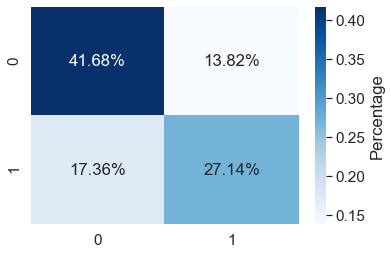

In [31]:
print(sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues',cbar_kws={'label': 'Percentage', 'orientation': 'vertical'}))

In [32]:
clf.score(X_test, y_test)

0.6881937436932392

### ROC (Receiver Operating Characteristic) Curve:

Como referido anteriormente a ROC Curve é uma medida de performance de um classificador. ROC é uma probabilidade e AUC (Area Under Curve) representa um o grau de separabilidade entre a classe positiva e a classe negativa, por outras palavras, diz-nos o quão capaz um modelo é de destinguir entre duas classes. Este valor está compreendido entre 0 e 1, sendo 0.5 o limiar entre classes.
<p>Um modelo cujas previsões estão 100% erradas tem uma AUC de 0, enquanto um modelo cujas previsões são 100% corretas tem uma AUC de 1.
<p>Maior AUC, melhor é o nosso classificador.
<p>
A ROC Curve normalmente é feita o plot tendo no eixo do Y <b>TPR (True Positive Rate)</b> ou Recall e no eixo do X <b>FPR (False Positive Rate)</b>.
<p>
O Recall já foi abordado, falta-nos então falar sobre <b>FPR</b>, que é dado por:
    <p> \begin{equation*}
            \frac{FP}{TN+FP}
        \end{equation*}

In [33]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [34]:


probs = clf.predict_proba(X_test) 
# da-nos a probabilidade de cada sample ser da classe positiva(coluna 1) e da classe negativa(coluna 0)
pd.DataFrame(probs).tail()

probs = probs[:, 1] #manter apenas a probabilidade da classe positiva

In [35]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc) #Obter AUC score

AUC: 0.75


In [36]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

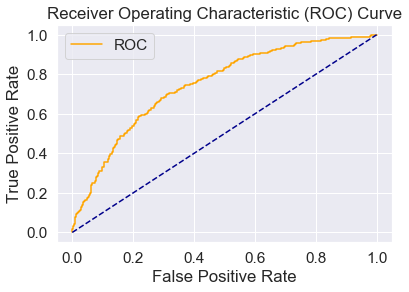

In [37]:
plot_roc_curve(fpr, tpr)

In [38]:
 def plot_pr_curve(recall, precision):
    plt.plot(recall, precision, color='orange', label='PR')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve (PR) Curve')
    plt.legend()
    plt.show()

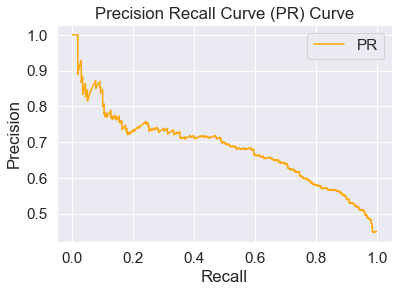

In [39]:

precision, recall, thresholds = precision_recall_curve(y_test, probs)

plot_pr_curve(recall,precision)

### Pergunta 4

<br><div style="text-align: justify"> 
Utilizar este modelo não é totalmente descabido, no entanto não é eficiente para este tipo de dados. Para estudos futuros, sugeria investigar outros tipos de abordagens com o intuito de obtermos melhores resultados.
</div>  

# K-Fold Cross Validation (BONUS)

Nos passos anteriores, fizemos uma divisão do nosso dataset em duas partes. Uma delas era de treino (75% do dataset original) e a outra de testes (25% restante do dataset original). Com estes dois subset's de dados,conseguimos treinar e testar o nosso modelo, no entanto este poderá apenas ser bom para esta divisão de dados, não sabendo se para outros dados vai ter a mesma performace relativamente às metricas utilizadas para classificar o modelo. <b>Uma vez que queremos que o nosso modelo seja "*badass*"</b>, não vamos fazer apenas uma divisão, vamos fazer *n* divisões de forma a termos a certeza que o nosso modelo é mesmo bom. É neste momento em que o *K-Fold Cross Validation* entra.

A validação *K-fold CV*, fornece a solução para o problema anterior dividindo os dados em dobras (*fold's*) e garantido que cada uma delas é utilizada como um conjunto de testes em algum momento.

Vamos agora ver um exemplo relacionado com o enunciado. Vamos supor que queremos dividir o nosso dataset em 5 fold's, neste caso vamos ter 5 subset's de dados. Na primeira iteração, a primeira dobra *(1ª fold)* é utilizada para testar o nosso modelo enquanto que as restantes são utilizadas para treinar o modelo. Na segunda iteração a segunda dobra *(2ª fold)* é utilizada como set de teste e as restante servem como set de treino e assim sucessivamente. A proxima figura ilutra a explicação anterior.

# Bonus

<img src="https://miro.medium.com/max/1509/1*IjKy-Zc9zVOHFzMw2GXaQw.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

In [40]:
cv = KFold(n_splits=5, random_state=40, shuffle=False)
clf = LogisticRegression(random_state=40 , solver ='lbfgs' , max_iter = 1250)
val_MCC =[]
fold = 1
for train_index, test_index in cv.split(independt):
    X_train, X_test = independt[train_index], independt[test_index]
    y_train, y_test = dependent[train_index], dependent[test_index]
   
    model = clf.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mcc = matthews_corrcoef(y_test, predictions)
    val_MCC.append(mcc)
    print("Mcc for fold "+ str(fold) + " is:  " + str(round(mcc,2)))
    fold-=-1
mean = round(sum(val_MCC)/len(val_MCC),2)
print("\nMean of MCC: " + str(mean))

Mcc for fold 1 is:  0.35
Mcc for fold 2 is:  0.25
Mcc for fold 3 is:  0.34
Mcc for fold 4 is:  0.38
Mcc for fold 5 is:  0.32

Mean of MCC: 0.33


Apos termos obtido este valor médio de *Matthews correlation coefficient*, podemos concluir que tal como tinhamos visto anteriormente,a regressão logistica não é o melhor modelo para este dataset.

Vamos então, a titulo de exemplo aplicar outros classificadores para verificar qual apresenta melhor mcc médio

In [41]:
svm = SVC(gamma ='auto')
rf = RandomForestClassifier(n_estimators=50)
KNN_model = KNeighborsClassifier(n_neighbors=5)
cv = KFold(n_splits=5, random_state=40, shuffle=False)
clf = LogisticRegression(random_state=40 , solver ='lbfgs', max_iter = 1250)

mcc_L = []
mcc_svm = []
mcc_rf = []
mcc_Knn = []
for train_index, test_index in cv.split(independt):
    X_train, X_test = independt[train_index], independt[test_index]
    y_train, y_test = dependent[train_index], dependent[test_index]
    
    model = clf.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mcc = matthews_corrcoef(y_test, predictions)
    mcc_L.append(mcc)
#     print(" clf: " + str(mcc))
    
    model = svm.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mcc = matthews_corrcoef(y_test, predictions)
    mcc_svm.append(mcc)
#     print(" svm: " + str(mcc))
    
    
    model = rf.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mcc = matthews_corrcoef(y_test, predictions)
    mcc_rf.append(mcc)
#     print(" rf: " + str(mcc))
    
    KNN_model= KNN_model.fit(X_train, y_train)
    predictions = KNN_model.predict(X_test)
    mcc = matthews_corrcoef(y_test, predictions)
    mcc_Knn.append(mcc)

In [42]:
print(f"Regressão Logistica: {round(sum(mcc_L)/len(mcc_L),3)}")

Regressão Logistica: 0.327


In [43]:
print(f"Support Vector Machine: {round(sum(mcc_svm)/len(mcc_svm),3)}")

Support Vector Machine: 0.159


In [44]:
print(f"Random Forest Classifier: {round(sum(mcc_rf)/len(mcc_rf),3)}")

Random Forest Classifier: 0.315


In [45]:
print(f"KNeighbors Classifier: {round(sum(mcc_Knn)/len(mcc_Knn),3)}")

KNeighbors Classifier: 0.137
